In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

year = 2015

boston_data = pd.read_csv(f"results{year}.csv")

def parse_pace(pace):
    values = str.split(pace, ":")
    if(len(values) != 3):
        return 0
    return int(values[0]) * 3600 + int(values[1]) * 60 + int(values[2])

if(year >= 2015):
    # Parsing string into seconds
    boston_data['pace'] = boston_data['pace'].dropna().apply(parse_pace)
    boston_data["5k"] = boston_data["5k"].dropna().apply(parse_pace)
    boston_data["10k"] = boston_data["10k"].dropna().apply(parse_pace)
    boston_data["20k"] = boston_data["20k"].dropna().apply(parse_pace)
    boston_data["30k"] = boston_data["30k"].dropna().apply(parse_pace)
    boston_data["35k"] = boston_data["35k"].dropna().apply(parse_pace)

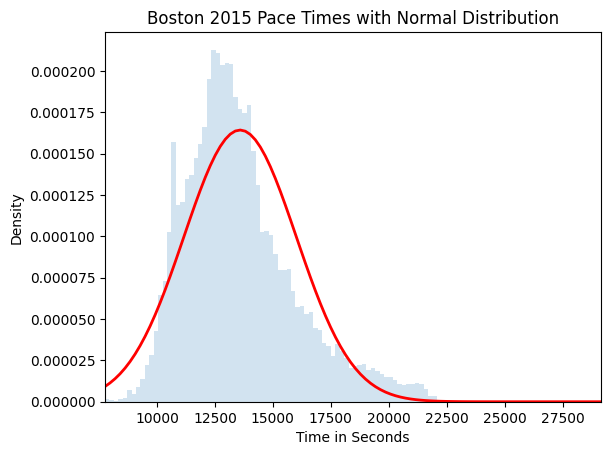

In [9]:
# Assuming you want to plot the distribution of the "pace" column after parsing
times = boston_data["seconds"].dropna().values

# Calculate mean and variance of the data
mean_time = np.mean(times)
deviation_time = np.std(times)

# Generate x values for the normal distribution
x_values = np.linspace(min(times), max(times), 100)

# Generate y values for the normal distribution
y_values = stats.norm.pdf(x_values, mean_time, deviation_time)

# Plot the histogram
plt.hist(times, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

# Plot the normal distribution
plt.plot(x_values, y_values, 'r-', lw=2)

# Adjust the x-axis range to ensure it covers the entire range of your data
plt.xlim(min(times), max(times))

plt.xlabel("Time in Seconds")
plt.ylabel("Density")
plt.title(f"Boston {year} Pace Times with Normal Distribution")
plt.show()

In [21]:
kolmogorov_times = random.sample(times.tolist(), 100)
shapiro_times = random.sample(times.tolist(), 30)

kolmogorov_test_result  = stats.kstest(kolmogorov_times, 'norm', args=(mean_time, deviation_time))
shapiro_test_result = stats.shapiro(shapiro_times)

print(kolmogorov_test_result.pvalue)
print(shapiro_test_result.pvalue)

threshold = 0.05
if(kolmogorov_test_result.pvalue < threshold):
    print("According to Kolmogorov-Smirnov test the hypothesis is rejected")
else:
    print("According to Kolmogorov-Smirnov test the hypothesis is accepted")

if(shapiro_test_result.pvalue < threshold):
    print("According to Shapiro test the hypothesis is rejected")
else:
    print("According to Shapiro test the hypothesis is accepted")

0.2994586761482045
0.2176247258866294
According to Kolmogorov-Smirnov test the hypothesis is accepted
According to Shapiro test the hypothesis is accepted


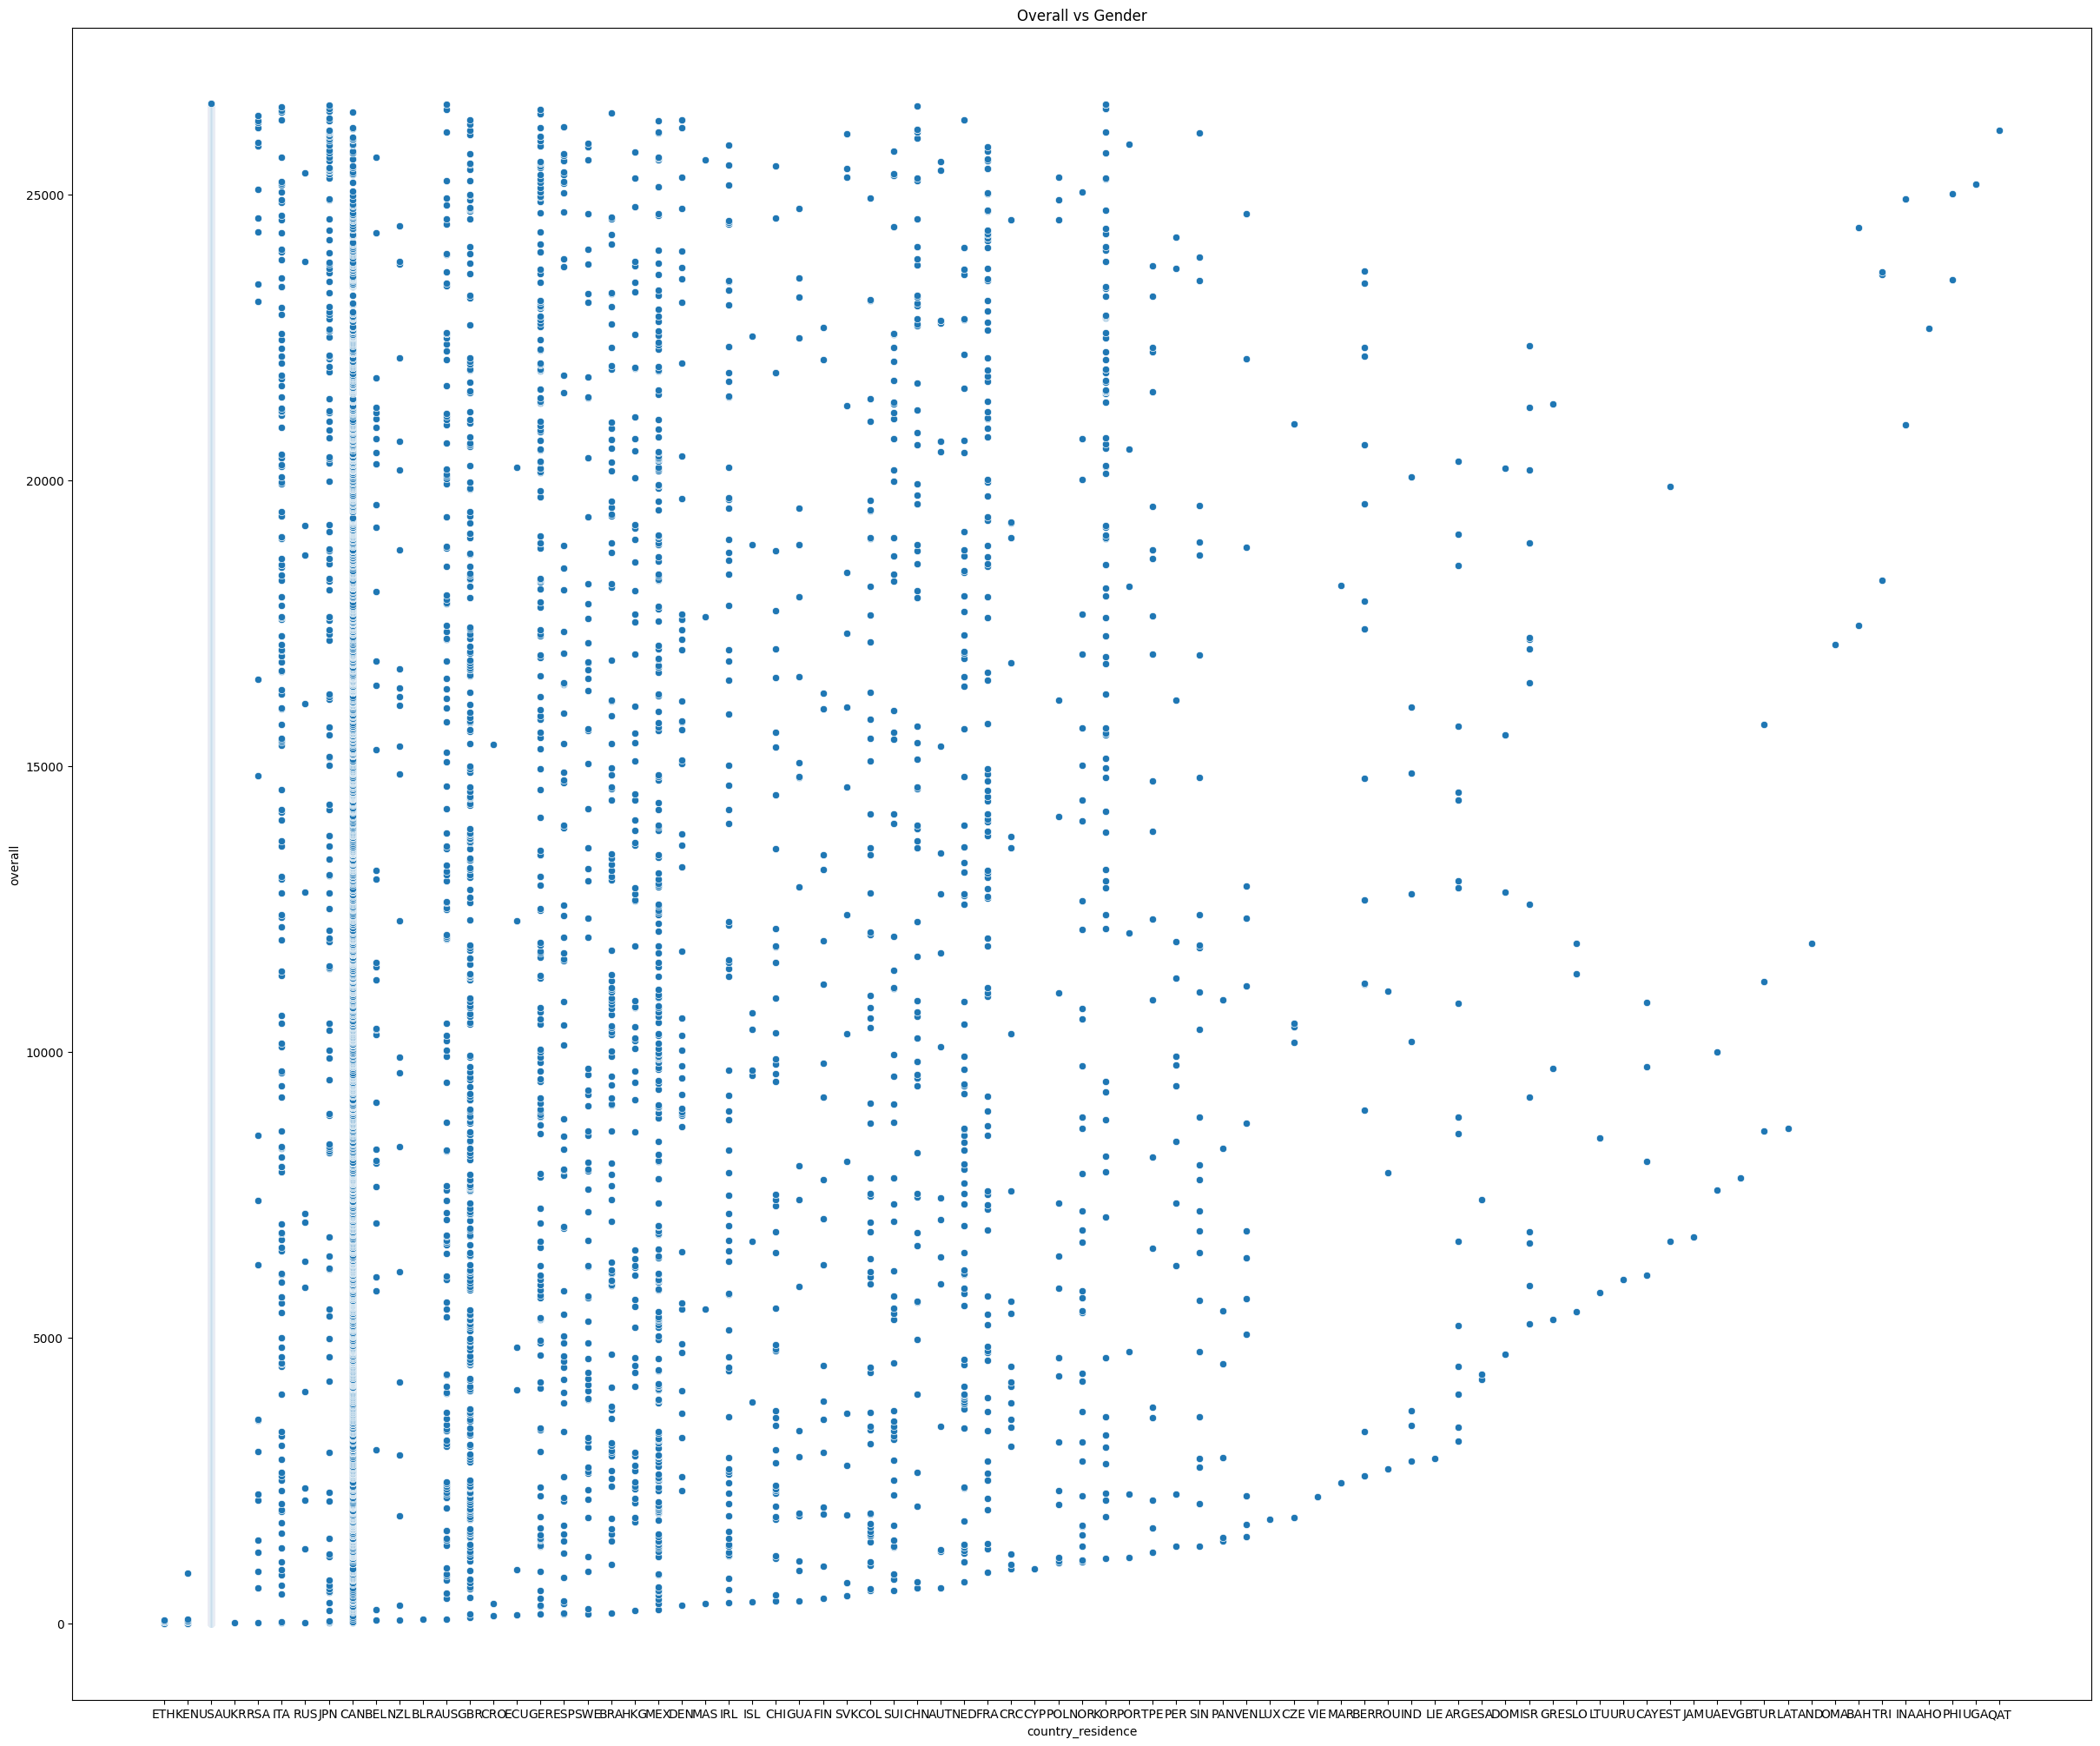

In [11]:
if(year >= 2015):
    # Gráfico de dispersión para Overall vs Country_Residence
    plt.figure(figsize=(30, 25))
    sns.scatterplot(x='country_residence', y='overall', data=boston_data)
    plt.title('Overall vs Gender')
    plt.show()

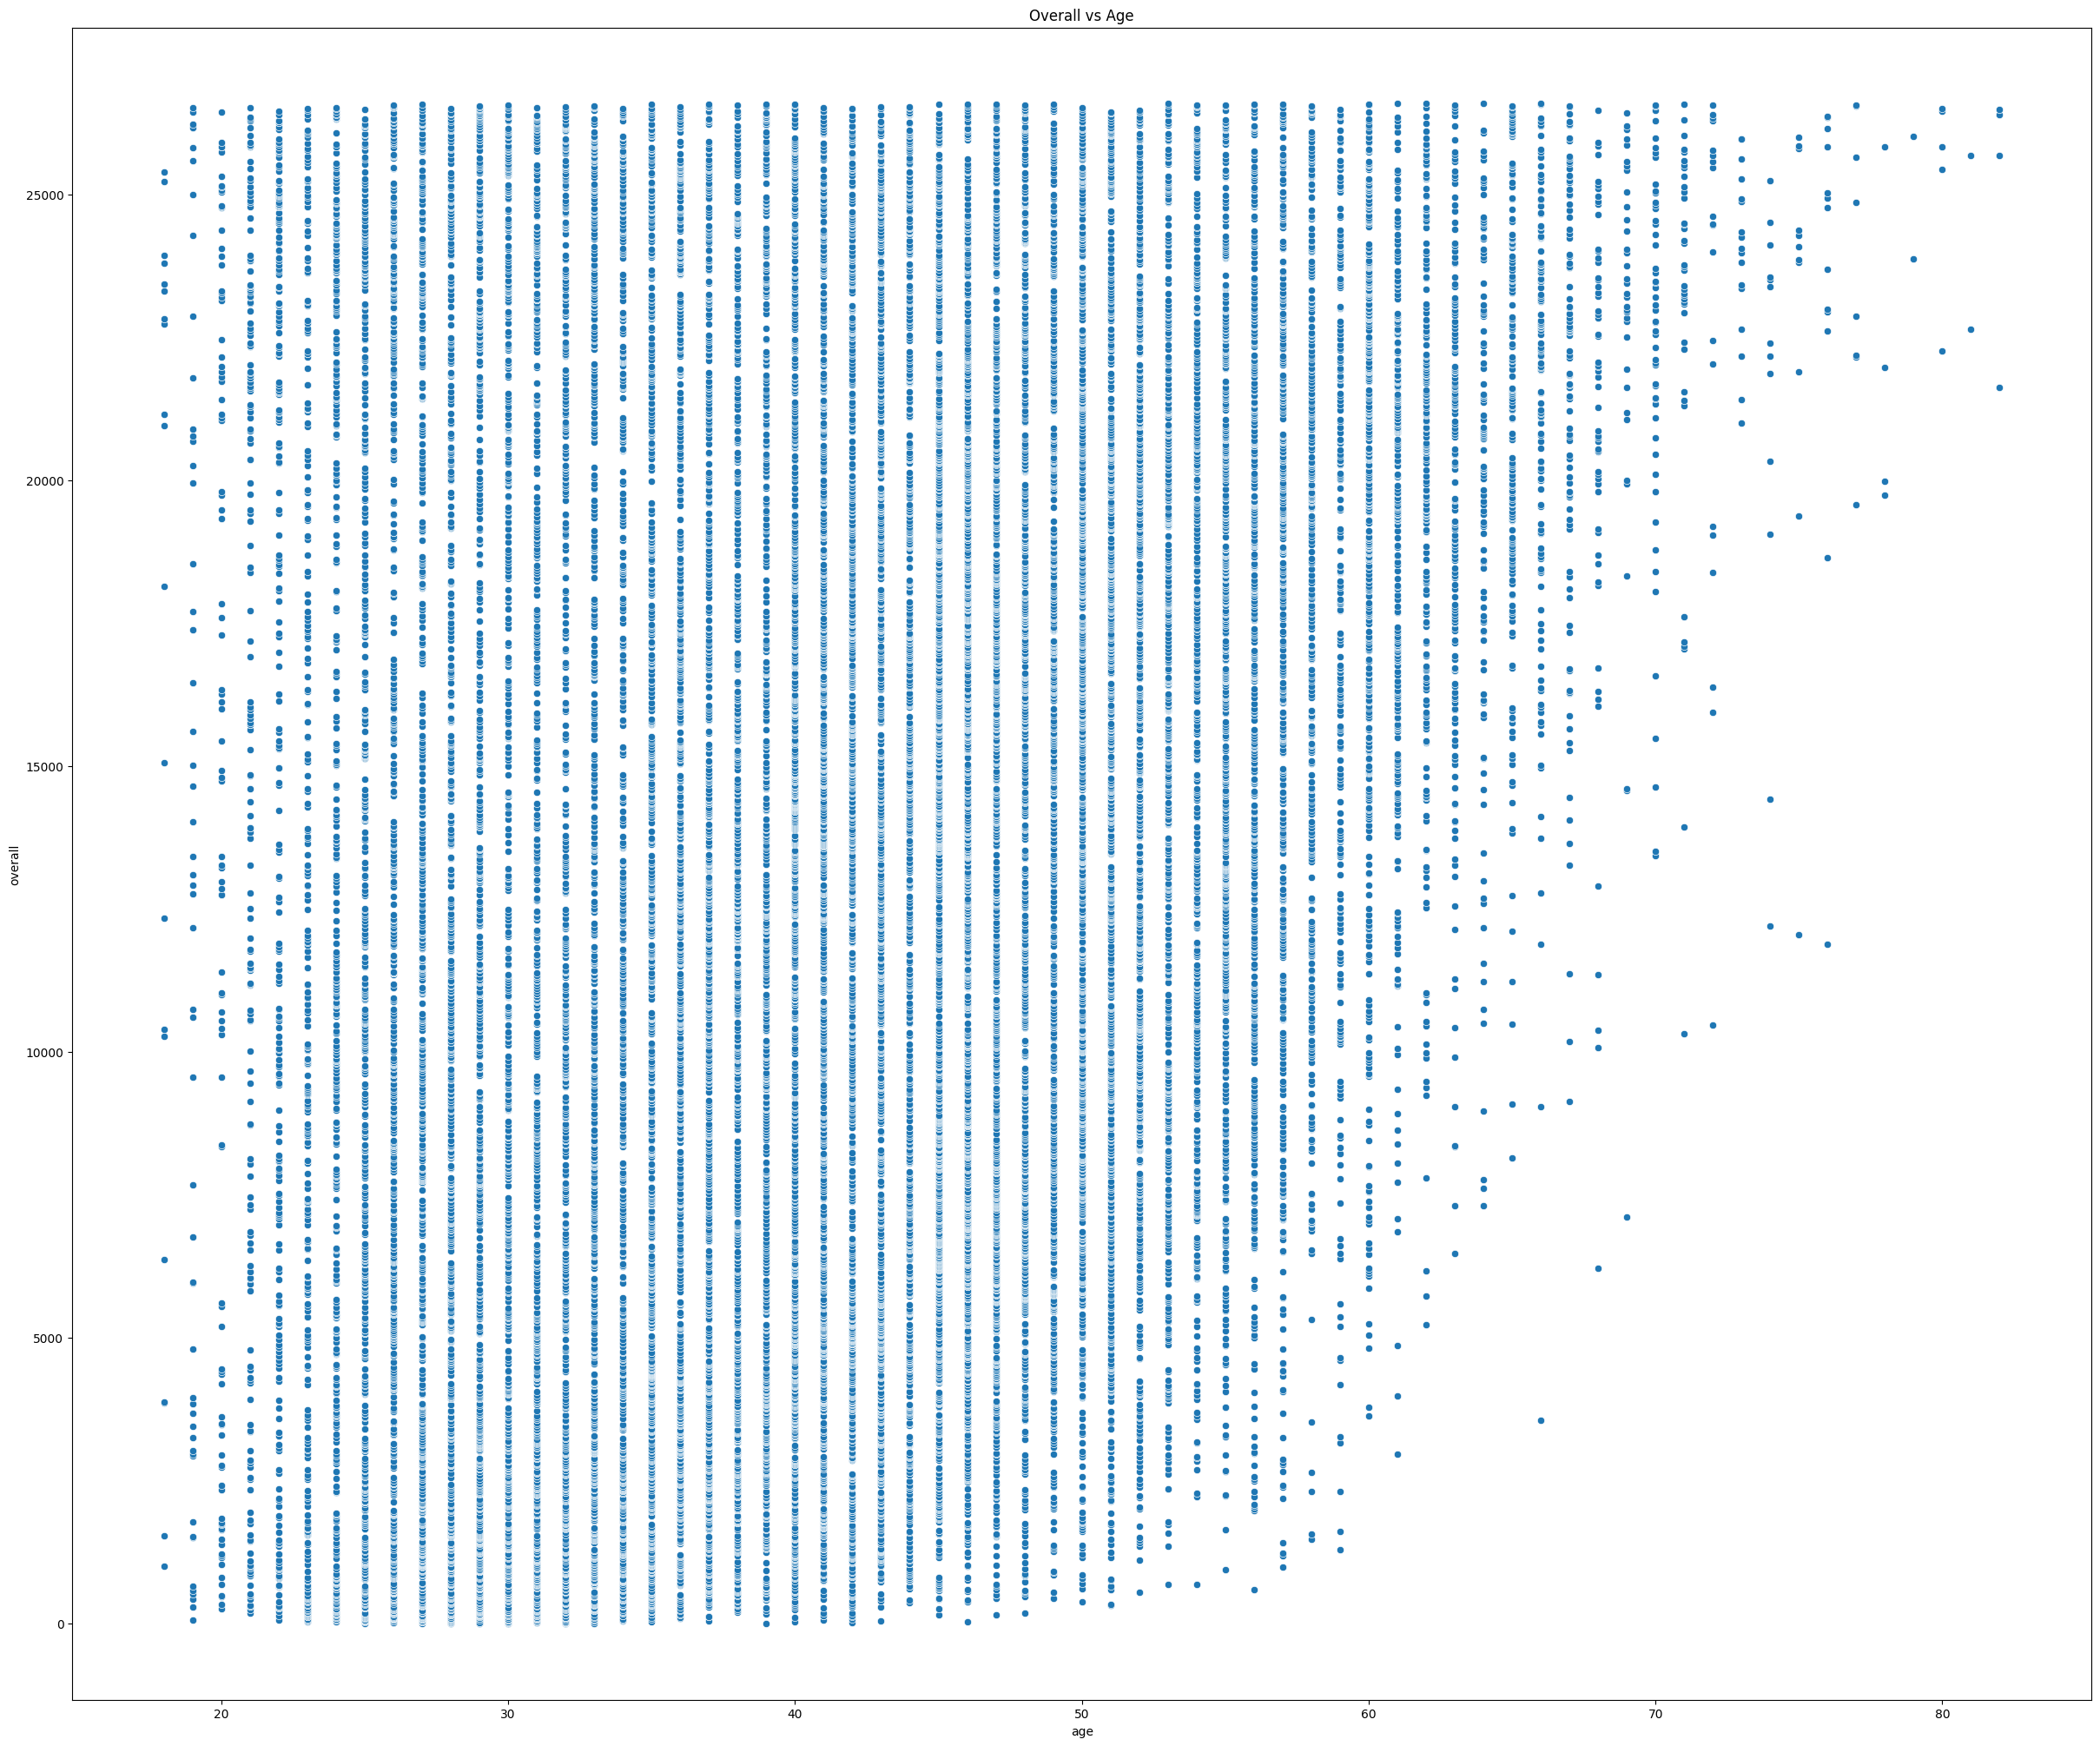

In [12]:
# Gráfico de dispersión para Overall vs Gender
plt.figure(figsize=(30, 25))
sns.scatterplot(x='age', y='overall', data=boston_data)
plt.title('Overall vs Age')
plt.show()

          seconds       age      pace        5k       10k       20k       30k  \
seconds  1.000000  0.226702  0.998962  0.797782  0.913670  0.939451  0.958438   
age      0.226702  1.000000  0.226601  0.181188  0.206933  0.217513  0.217086   
pace     0.998962  0.226601  1.000000  0.795384  0.911019  0.936843  0.955878   
5k       0.797782  0.181188  0.795384  1.000000  0.862629  0.843522  0.822177   
10k      0.913670  0.206933  0.911019  0.862629  1.000000  0.953280  0.935173   
20k      0.939451  0.217513  0.936843  0.843522  0.953280  1.000000  0.959105   
30k      0.958438  0.217086  0.955878  0.822177  0.935173  0.959105  1.000000   
35k      0.952632  0.218482  0.950119  0.802573  0.920110  0.935502  0.953551   

              35k  
seconds  0.952632  
age      0.218482  
pace     0.950119  
5k       0.802573  
10k      0.920110  
20k      0.935502  
30k      0.953551  
35k      1.000000  


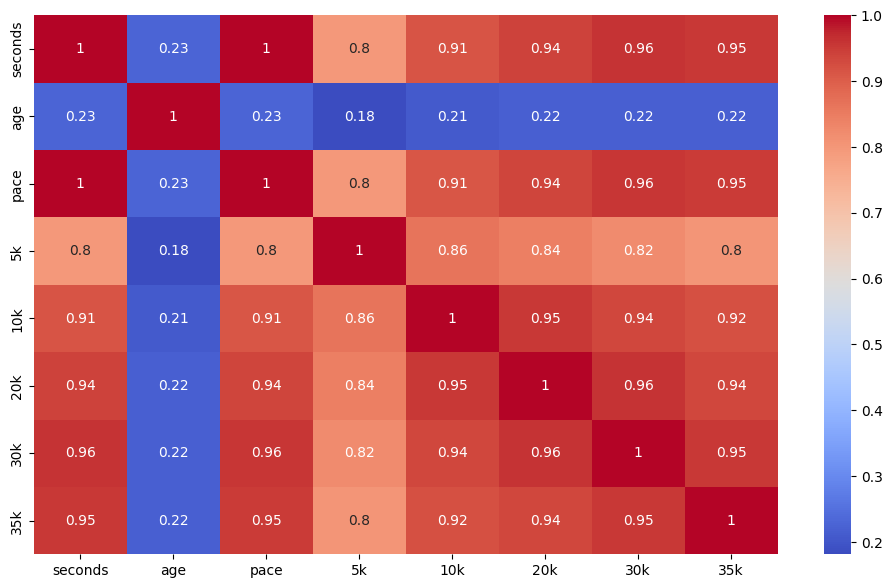

In [13]:
if(year >= 2015):
    selected_columns = ["seconds", "age", "pace", "5k", "10k", "20k", "30k", "35k"]
    race_numerical_data = boston_data[selected_columns]
    correlation_matrix = race_numerical_data.corr()
    print(correlation_matrix)

    fig, ax = plt.subplots(figsize=(12, 7)) 
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

Suponiendo que los tiempos de carrera poseen una **distribución normal**, con **varianza conocida** (tomemos la varianza de la carrera de 2005); y que solo podemos seleccionar 50 tiempos de los resultados del 2015 de manera aleatoria (imaginemos que no podemos permitirnos pagar por más). 
`¿Podríamos afirmar con estos datos que la carrera de 2015 fue en promedio más rápida que la del 2005?`

In [14]:
n = 50

data_2005 = pd.read_csv(f"results2005.csv")
data_2015 = pd.read_csv(f"results2015.csv")

times_2005 = data_2005["seconds"].dropna().tolist()
times_2015 = data_2015["seconds"].dropna().tolist()
picked_times_2015 = random.sample(times_2015, n)

mean_2005 = np.mean(times_2005)

# Use 2005 variance as the known variance
variance_2005 = np.var(times_2005)
standard_deviation_2005 = np.sqrt(variance_2005)

mean_2015 = np.mean(picked_times_2015)

# Calculate the one-side z-statistic
# One-side z-statistic = X - u / (sqrt(var) / sqrt(n))
statistic = (mean_2015 - mean_2005) / (standard_deviation_2005 / np.sqrt(n))

p_value = stats.norm.cdf(statistic)

# Significance level
alpha = 0.05 

# print(statistic)
print(f"p-value {p_value}")

# print(mean_2005)
# print(mean_2015)

if p_value > alpha:
    print("2015 race was not significantly faster than 2005 race")
else:
    print("2015 was indeed significantly faster than 2005 race")

p-value 0.0386064207587043
2015 was indeed significantly faster than 2005 race


`¿Y si la varianza no fuera conocida?`

In [15]:
n = 50

data_2005 = pd.read_csv(f"results2005.csv")
data_2015 = pd.read_csv(f"results2015.csv")

times_2005 = data_2005["seconds"].dropna().tolist()
times_2015 = data_2015["seconds"].dropna().tolist()
picked_times_2015 = random.sample(times_2015, n)

mean_2005 = np.mean(times_2005)
mean_2015 = np.mean(picked_times_2015)
variance_2015 = np.var(picked_times_2015)
standard_deviation_2015 = np.sqrt(variance_2015)

# Calculate one-side t-statistic
# One-side t-statistic = X - u / (S / sqrt(n))
statistic = (mean_2015 - mean_2005) / (standard_deviation_2015 / np.sqrt(n))

degrees_of_freedom = n - 1
p_value = stats.t.cdf(statistic, degrees_of_freedom)

# Significance level
alpha = 0.05

print(f"p-value {p_value}")

if p_value > alpha:
    print("2015 race was not significantly faster than 2005 race")
else:
    print("2015 was indeed significantly faster than 2005 race")

p-value 4.4894254019097116e-06
2015 was indeed significantly faster than 2005 race
